<a href="https://colab.research.google.com/github/Pupan-cpe/trian-I-net/blob/master/Introduction_to_Deep_Learning_Exercise_with_Keras_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Sep 22 09:57:38 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    73W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import necessary functions
from __future__ import print_function
import matplotlib.pyplot as plt
import pdb
import numpy as np

In [3]:
# TensorFlow 1x
# import keras
# from keras.datasets import mnist
# from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, Input
# from keras.models import Model
# from keras import backend as K

# TensorFlow 2x
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model

In [4]:
def network_C(input_shape):
    input_data = Input(shape=input_shape)
    x = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(input_data)
    x = Flatten()(x)
    x = Dense(16, activation='relu')(x)
    output_data = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_data, outputs=output_data)
    return model

In [5]:
def network_D(input_shape):
    input_data = Input(shape=input_shape)
    x = Conv2D(8, kernel_size=(3, 3), activation='relu', padding='same')(input_data)  
    x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_data = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_data, outputs=output_data)
    return model

In [6]:
# Specify parameters
batch_size = 128
num_classes = 10
epochs = 50
# Specify input image dimensions
img_rows, img_cols = 32, 32

In [7]:
# Split data into training/test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
# pdb.set_trace()

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [8]:
# Reformat the data
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)
# pdb.set_trace()

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


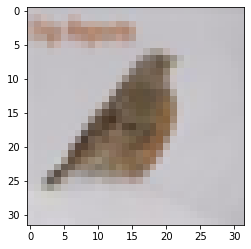

In [9]:
# Preprocess the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

plt.figure(1)
plt.imshow(np.squeeze(x_train[108,:,:,:]))
plt.show()

In [10]:
# Convert the integer-encoding to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('y_train shape:', y_train.shape)
# pdb.set_trace()

y_train shape: (50000, 10)


In [11]:
####### To be completed: Create and compile a model #######
model = network_C(input_shape)

########################################################
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
model.summary()
# pdb.set_trace()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                131088    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 131,482
Trainable params: 131,482
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/50
391/391 [==============================] - 3s 8ms/step - loss: 1.8981 - accuracy: 0.3136 - val_loss: 1.5985 - val_accuracy: 0.4244
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 1.5327 - accuracy: 0.4484 - val_loss: 1.4919 - val_accuracy: 0.4510
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 1.4526 - accuracy: 0.4775 - val_loss: 1.4512 - val_accuracy: 0.4749
Epoch 4/50
391/391 [==============================] - 3s 7ms/step - loss: 1.4018 - accuracy: 0.4950 - val_loss: 1.4171 - val_accuracy: 0.4858
Epoch 5/50
391/391 [==============================] - 3s 7ms/step - loss: 1.3683 - accuracy: 0.5086 - val_loss: 1.4067 - val_accuracy: 0.4953
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 1.3414 - accuracy: 0.5169 - val_loss: 1.4148 - val_accuracy: 0.4909
Epoch 7/50
391/391 [==============================] - 3s 7ms/step - loss: 1.3173 - accuracy: 0.5275 - val_loss: 1.4126 - val_accuracy: 0.4971
Epoch 

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

Test loss: 1.3933939933776855
Test accuracy: 0.5321000218391418
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


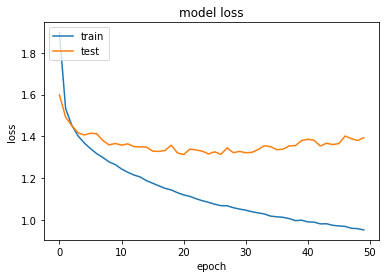

In [15]:
# summarize history for loss
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

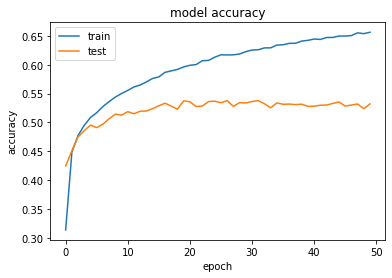

In [16]:
# summarize history for accuracy
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')